In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf

def getKmers(sequence, size=3):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

names = ['Class', 'id', 'sequenceRaw']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data',names = names)

sequences = list(data['sequenceRaw'])
dataset = np.array([])

for seq in sequences:
    dataset = np.append(dataset,''.join(seq.split()))
    
data['sequence'] = dataset
data = data.drop(['sequenceRaw'], axis=1)
data.head()

,Class,id,sequence
0,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,+,LEU1_TRNA,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...


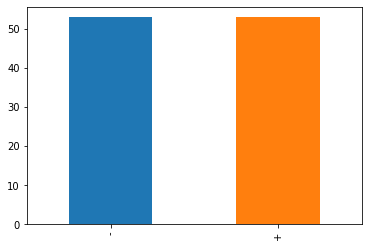

In [2]:
data['Class'].value_counts().plot(kind='bar');

In [3]:
data['words'] = data.apply(lambda x: ' '.join(getKmers(x['sequence'])), axis=1)
vectorizer = CountVectorizer(ngram_range=(0, 1))
X = vectorizer.fit_transform(data['words'])

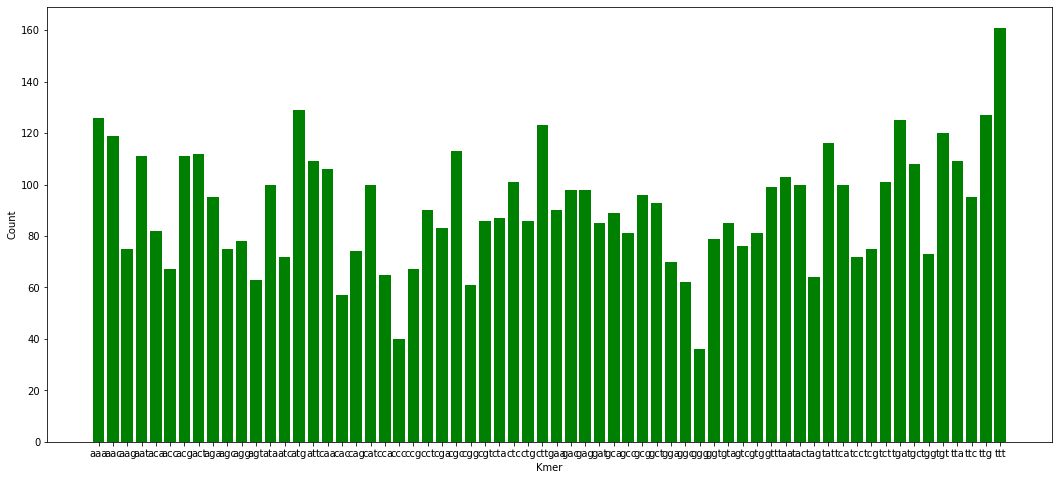

In [4]:
kmerDistributions = np.zeros(len(vectorizer.get_feature_names()))
for v in X.toarray():
    for i in range(0,v.shape[0]):
        kmerDistributions[i] += v[i]
        
x_pos = [i for i, _ in enumerate(kmerDistributions)]

plt.figure(figsize=(18,8))
plt.bar(x_pos, kmerDistributions, color='green')
plt.xlabel("Kmer")
plt.ylabel("Count")
plt.xticks(x_pos, vectorizer.get_feature_names())
plt.show()

In [5]:
classes = np.array([])
for s in data['Class']:
    if s == '+':
        classes = np.append(classes,0)
    else:
        classes = np.append(classes,1)
classes = tf.keras.utils.to_categorical(classes)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(X.shape[1],)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(classes.shape[1],activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1

In [7]:
model.fit(X.toarray(),classes,batch_size = 4,epochs=50,validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 1s 69ms/step - loss: 0.6978 - accuracy: 0.6071 - val_loss: 0.8991 - val_accuracy: 0.2727
Epoch 2/50
21/21 [==============================] - 0s 19ms/step - loss: 0.5545 - accuracy: 0.6786 - val_loss: 0.9828 - val_accuracy: 0.3636
Epoch 3/50
21/21 [==============================] - 0s 19ms/step - loss: 0.4382 - accuracy: 0.8095 - val_loss: 1.0390 - val_accuracy: 0.4091
Epoch 4/50
21/21 [==============================] - 0s 19ms/step - loss: 0.4146 - accuracy: 0.7976 - val_loss: 0.8887 - val_accuracy: 0.7273
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 0.3060 - accuracy: 0.9048 - val_loss: 1.0627 - val_accuracy: 0.7273
Epoch 6/50
21/21 [==============================] - 0s 20ms/step - loss: 0.3131 - accuracy: 0.8690 - val_loss: 1.0170 - val_accuracy: 0.7273
Epoch 7/50
21/21 [==============================] - 0s 19ms/step - loss: 0.1908 - accuracy: 0.9286 - val_loss: 1.2482 - val_accuracy: 0.7273
Epoch 8/50
21